In [ ]:
#!pip install tensorflow

In [ ]:
#conda update dask 
#se necesita

In [1]:
import tflearn
# The easiest way to get started building deep neural networks.
from tflearn.data_utils import to_categorical,pad_sequences
from tflearn.datasets import imdb
# IMDB movie ratings.
# Coolector movie database

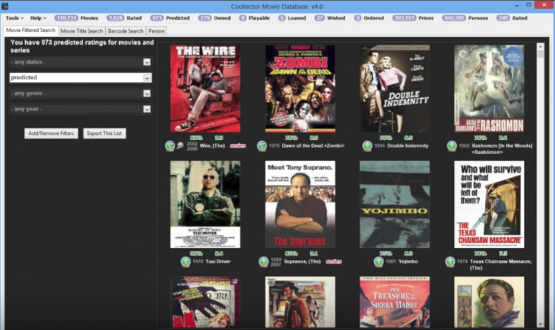

In [2]:
# IMDB Dataset loading
# this will download our data set from the web.
# We'll name the path where we want to save it, the extension being pkl,
# which means it's a byte stream, 
# This makes it easier to convert to other python objects like list or 
# tuples later, 
# We want 10,000 words from the database, and we only want to use 10%

train,test, _ = imdb.load_data(path="imdb.pkl",n_words=10000,
                              valid_portion=0.1)
# load data will return our movie review split into a training and testing set.

In [3]:
#We cant then further split those sets into reviews and labels and set then
#equal to X and Y values.

trainX, trainY = train
testX, testY = test

In [26]:
len(trainX)

22500

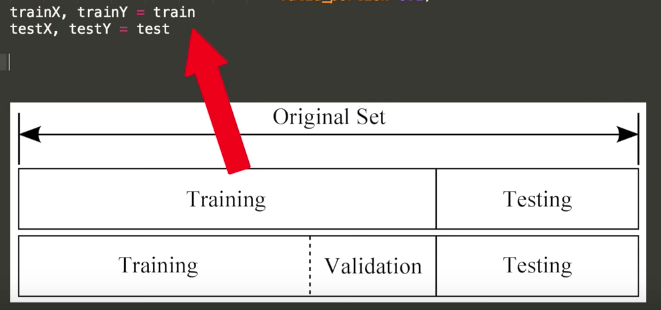

# While training data helps us fit our weights, validation data helps prevent over fitting by letting us tune our hyper parameters accordingly. 

- Neural nets are algorithms that essentially just apply a series of computations to your matrices. So, converting them to numerical representations or vectors is necessary. 

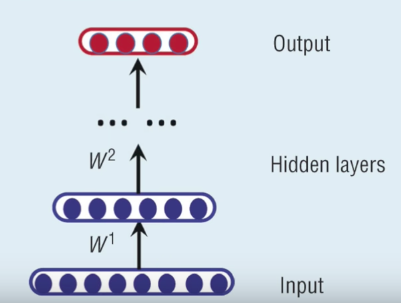

In [4]:
# Data preprocessing
#Sequence padding 
# The pad_sequences function will do that for our vies text.
# It'll convert each review into a matrix and pad it.
# Padding is necessary to ensure consistency in our inputs
# It will pad each sequence with a zero at the end which we specify until it.
# reaches the max possible sequence length which we'll set to 100


trainX = pad_sequences(trainX,maxlen=100,value=0.)
testX = pad_sequences(testX,maxlen=100,value=0.)


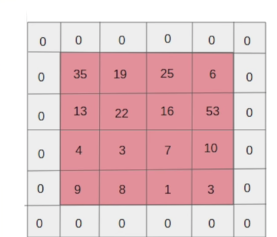

In [28]:
len(trainX)

22500

In [5]:
# Converting labels to binary vectors

# We also want to convert our labels to vectors as wll and we can
# easily do that using the two categorical function.
# These are binary vectors with two classes, 1 which is positive
#or 0 whcih is negative

trainY = to_categorical(trainY,nb_classes=2)
testY = to_categorical(testY,nb_classes=2)



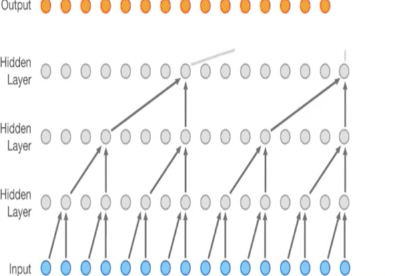

In [6]:
# Network building
# First will be our impro layer, this is where we feed data into our network
# The only perameter we'll specify is the input shape.
net = tflearn.input_data([None,100] )
# The first element is the batch size, which we'll set to none and 
# then the lenght, which is 100, since we set our max sequence length to 100

# our next layer is our embedding layer. 
# The first perameter would be the output vector we receive
# from the previous layer, and by the way
# for every layer we write we'll be using the previous layer's outputs
# as inputs. 
# This is how data flows through a neural network, at each layer 
# it's transformed like a seven layer dip of computation. 

net = tflearn.embedding(net, input_dim=10000,output_dim=128)
# We'll set dimensions to 10,000 since that's how many words we loaded from
# our data set earlier.
# And the output dimension to 128, which is the number of dimensions in our
# resulting embedding's 

In [7]:
# Next, we'll feed those values to our LSTM layer (Long short term memory)
# This layer allows our network to remember data from the beginning of 
# the sequences, which will improve our prediction.

net = tflearn.lstm(net,128,dropout=0.)

# We'll set dropout to 0.08 which is a technique that helps prevent
# over fitting by randomly turning on and off different pathways in our
# network.

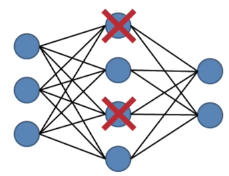

In [8]:
# our next layer is fully connected which means that every neuron in 
# the previous layer is connected to every neuron in this layer. 

net = tflearn.fully_connected(net,2,activation='softmax')

# We have a set of learned feature vectors from previous layers,
# and adding a fully connected layer is a computationally cheap way
# of learning non-linear combinations of them.
# it's got two units, and it's using the softmax function as
# its activation function

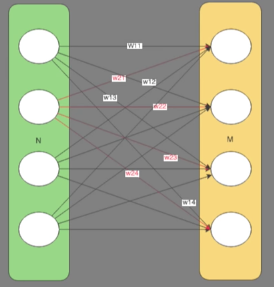

In [9]:
# this will take in a vector of values and squash it into a vector of
# output probabilities between 0 and 1, that sum to 1

# We'll use those values in our last layer, which is our regression layer.
# This will apply a regression operation to the input.
net = tflearn.regression(net,optimizer='adam',learning_rate=0.0001,
                        loss="categorical_crossentropy")
# We're going to specify an optimizer method that will minimize a given
# a loss function, as well as the learning rate, 
# which specifies how fast we want our network to train.

# The optimizer we'll use is adam, which performs gradient descent.
# and categorical cross entropy is our loss, it helps to find the difference
# between our predicted output and the expected output.

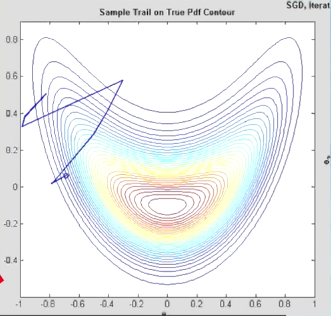

In [10]:
# after building our neural network, we can go ahead and 
# initialize it using tflearn's deep neural net function.

# Training
model = tflearn.DNN(net,tensorboard_verbose=0)

# Then we can call our models fit function, which will launch
# the training process for our given training and validation data.


In [11]:
# we'll also set show metric to true so 
model.fit(trainX, trainY, validation_set=(testX,testY),
          show_metric=True,batch_size=33)
# we can view the log of accuracy during training.


Training Step: 6819  | total loss: 0.16153 | time: 91.378s
| Adam | epoch: 010 | loss: 0.16153 - acc: 0.9518 -- iter: 22473/22500
Training Step: 6820  | total loss: 0.15228 | time: 94.214s
| Adam | epoch: 010 | loss: 0.15228 - acc: 0.9566 | val_loss: 0.66224 - val_acc: 0.7900 -- iter: 22500/22500
--


In [ ]:
# So to demo this we're going to run this in the cloud using AWS.
# What we'll do is use a prebuilt amazon machine image. 

# This AMI can be used to launch an instance and it's got every depencdency 

# we need built in, including tensor flow, CUDA, lil wayne's deposition video


In [15]:
model.save("My_test_model.tfl")

INFO:tensorflow:/Users/MichelMacSDD/1Jupyter/Iteso_Simulacion2017/Simulaciones/SirajRaval_Ejemplos/IntroDeeplearning/My_test_model.tfl is not in all_model_checkpoint_paths. Manually adding it.


INFO:tensorflow:/Users/MichelMacSDD/1Jupyter/Iteso_Simulacion2017/Simulaciones/SirajRaval_Ejemplos/IntroDeeplearning/My_test_model.tfl is not in all_model_checkpoint_paths. Manually adding it.
